<a href="https://colab.research.google.com/github/harrisb002/GrainBoundaryDetection/blob/StarDist/DataCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preperation
---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import io

In [ ]:
# Load the images
original_BC_path = '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/band_image.tif'
mask_BC_path = '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/mask_band_image.tif'

original_img = io.imread(original_BC_path)
mask_img = io.imread(mask_BC_path)

In [ ]:
# Print the shape of the original and mask images
print("Shape of original image:", original_img.shape)
print("Shape of mask image:", mask_img.shape)

Shape of original image: (2028, 3523)
Shape of mask image: (2028, 3523)


In [ ]:
# Define the size of the crops
crop_size = (256, 256)

# Calculate the number of crops that fit into the images
original_height, original_width = original_img.shape[:2]
n_crops_width = original_width // crop_size[0]
n_crops_height = original_height // crop_size[1]

# Print their values to see what we workin with lol
print("original_height:", original_height)
print("original_width:", original_width)
print("n_crops_width:", n_crops_width)
print("n_crops_height:", n_crops_height)

# Calculate the total number of 256x256 crops from the image
total_crops = n_crops_width * n_crops_height
print("\nTotal number of cropped images:", total_crops)


original_height: 2028
original_width: 3523
n_crops_width: 13
n_crops_height: 7

Total number of cropped images: 91


# Take original BC image and its mask and generate lists for both with numbers to match them

In [ ]:
# Function to crop the images
def crop_images(original, mask, num_width, num_height, size):
    crops = []
    for i in range(num_height):
        for j in range(num_width):
            # Calculate the starting and ending indices for the crop
            start_x = j * size[0]
            start_y = i * size[1]
            end_x = start_x + size[0]
            end_y = start_y + size[1]

            # Crop the original and mask images to the same area using array slicing
            crop_original = original[start_y:end_y, start_x:end_x]
            crop_mask = mask[start_y:end_y, start_x:end_x]

            # Append the crops to the list
            crops.append({
                'original': crop_original,
                'mask': crop_mask,
                'position': (i, j)
            })

    return crops

# Crop the images
crops = crop_images(original_img, mask_img, n_crops_width, n_crops_height, crop_size)

# Save the cropped images to files
output_files = []
for i, crop in enumerate(crops):
    original_crop_path = f'/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/mydata/original_crop{i}.tif'
    mask_crop_path = f'/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/mydata/mask_crop{i}.tif'
    io.imsave(original_crop_path, crop['original'])
    io.imsave(mask_crop_path, crop['mask'])
    output_files.append((original_crop_path, mask_crop_path))

# Return the paths of the first few cropped images for display
output_files[:5]  # Show paths of the first 5 sets of cropped images

[('/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/original_crop0.tif',
  '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/mask_crop0.tif'),
 ('/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/original_crop1.tif',
  '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/mask_crop1.tif'),
 ('/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/original_crop2.tif',
  '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/mask_crop2.tif'),
 ('/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/original_crop3.tif',
  '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/mask_crop3.tif'),
 ('/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/rawdata/original_crop4.tif',
  '/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/r

# Display random pair of original cropped image and its corresponding mask

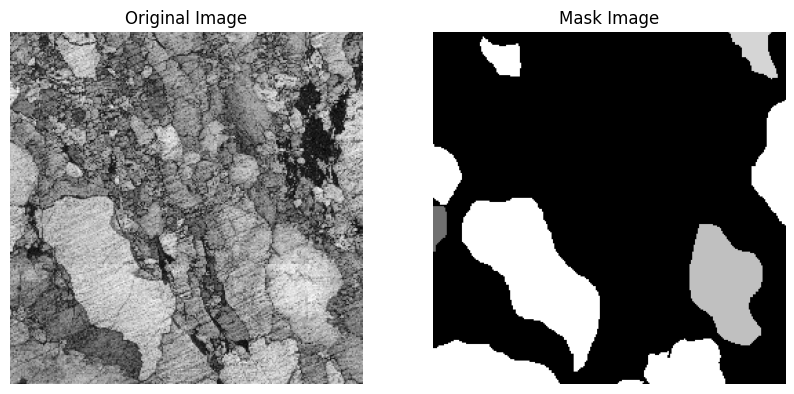

In [ ]:
# Function to display a random pair of original and mask images using matplotlib
def random_pair(crops):

    # Randomly select one set of crops
    selected_pair = random.choice(crops)
    original_crop = selected_pair['original']
    mask_crop = selected_pair['mask']

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Display the original crop
    axes[0].imshow(original_crop, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Image')

    # Display the mask crop
    axes[1].imshow(mask_crop, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Mask Image')

    # Display the plot
    plt.show()

# Display a random pair using matplotlib
random_pair(crops)
